In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

In [32]:
df = pd.read_csv('combined2.csv', sep=';')
print(df)
X = df.drop('OK', axis=1)
y = df['OK']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

         OK  DF_Press_Height_(mm)  Program_No  Output_(kW)  Runout_(mm)  \
0      True                 0.010           2         1.81         0.16   
1      True                 0.007           2         1.81         0.09   
2      True                 0.017           2         1.81         0.16   
3      True                 0.023           2         1.81         0.15   
4     False                 0.005           2         1.81         0.13   
...     ...                   ...         ...          ...          ...   
1876   True                 0.003           2         1.81         0.12   
1877   True                -0.009           2         1.81         0.06   
1878   True                 0.019           2         1.81         0.06   
1879  False                -0.022           2         1.81         0.10   
1880  False                 0.006           2         1.81         0.10   

      Point_X  Point_Y  Point  Bottle_Length_(mm)  DF_Force_(kN)  ...  \
0       -0.56  -300.44    

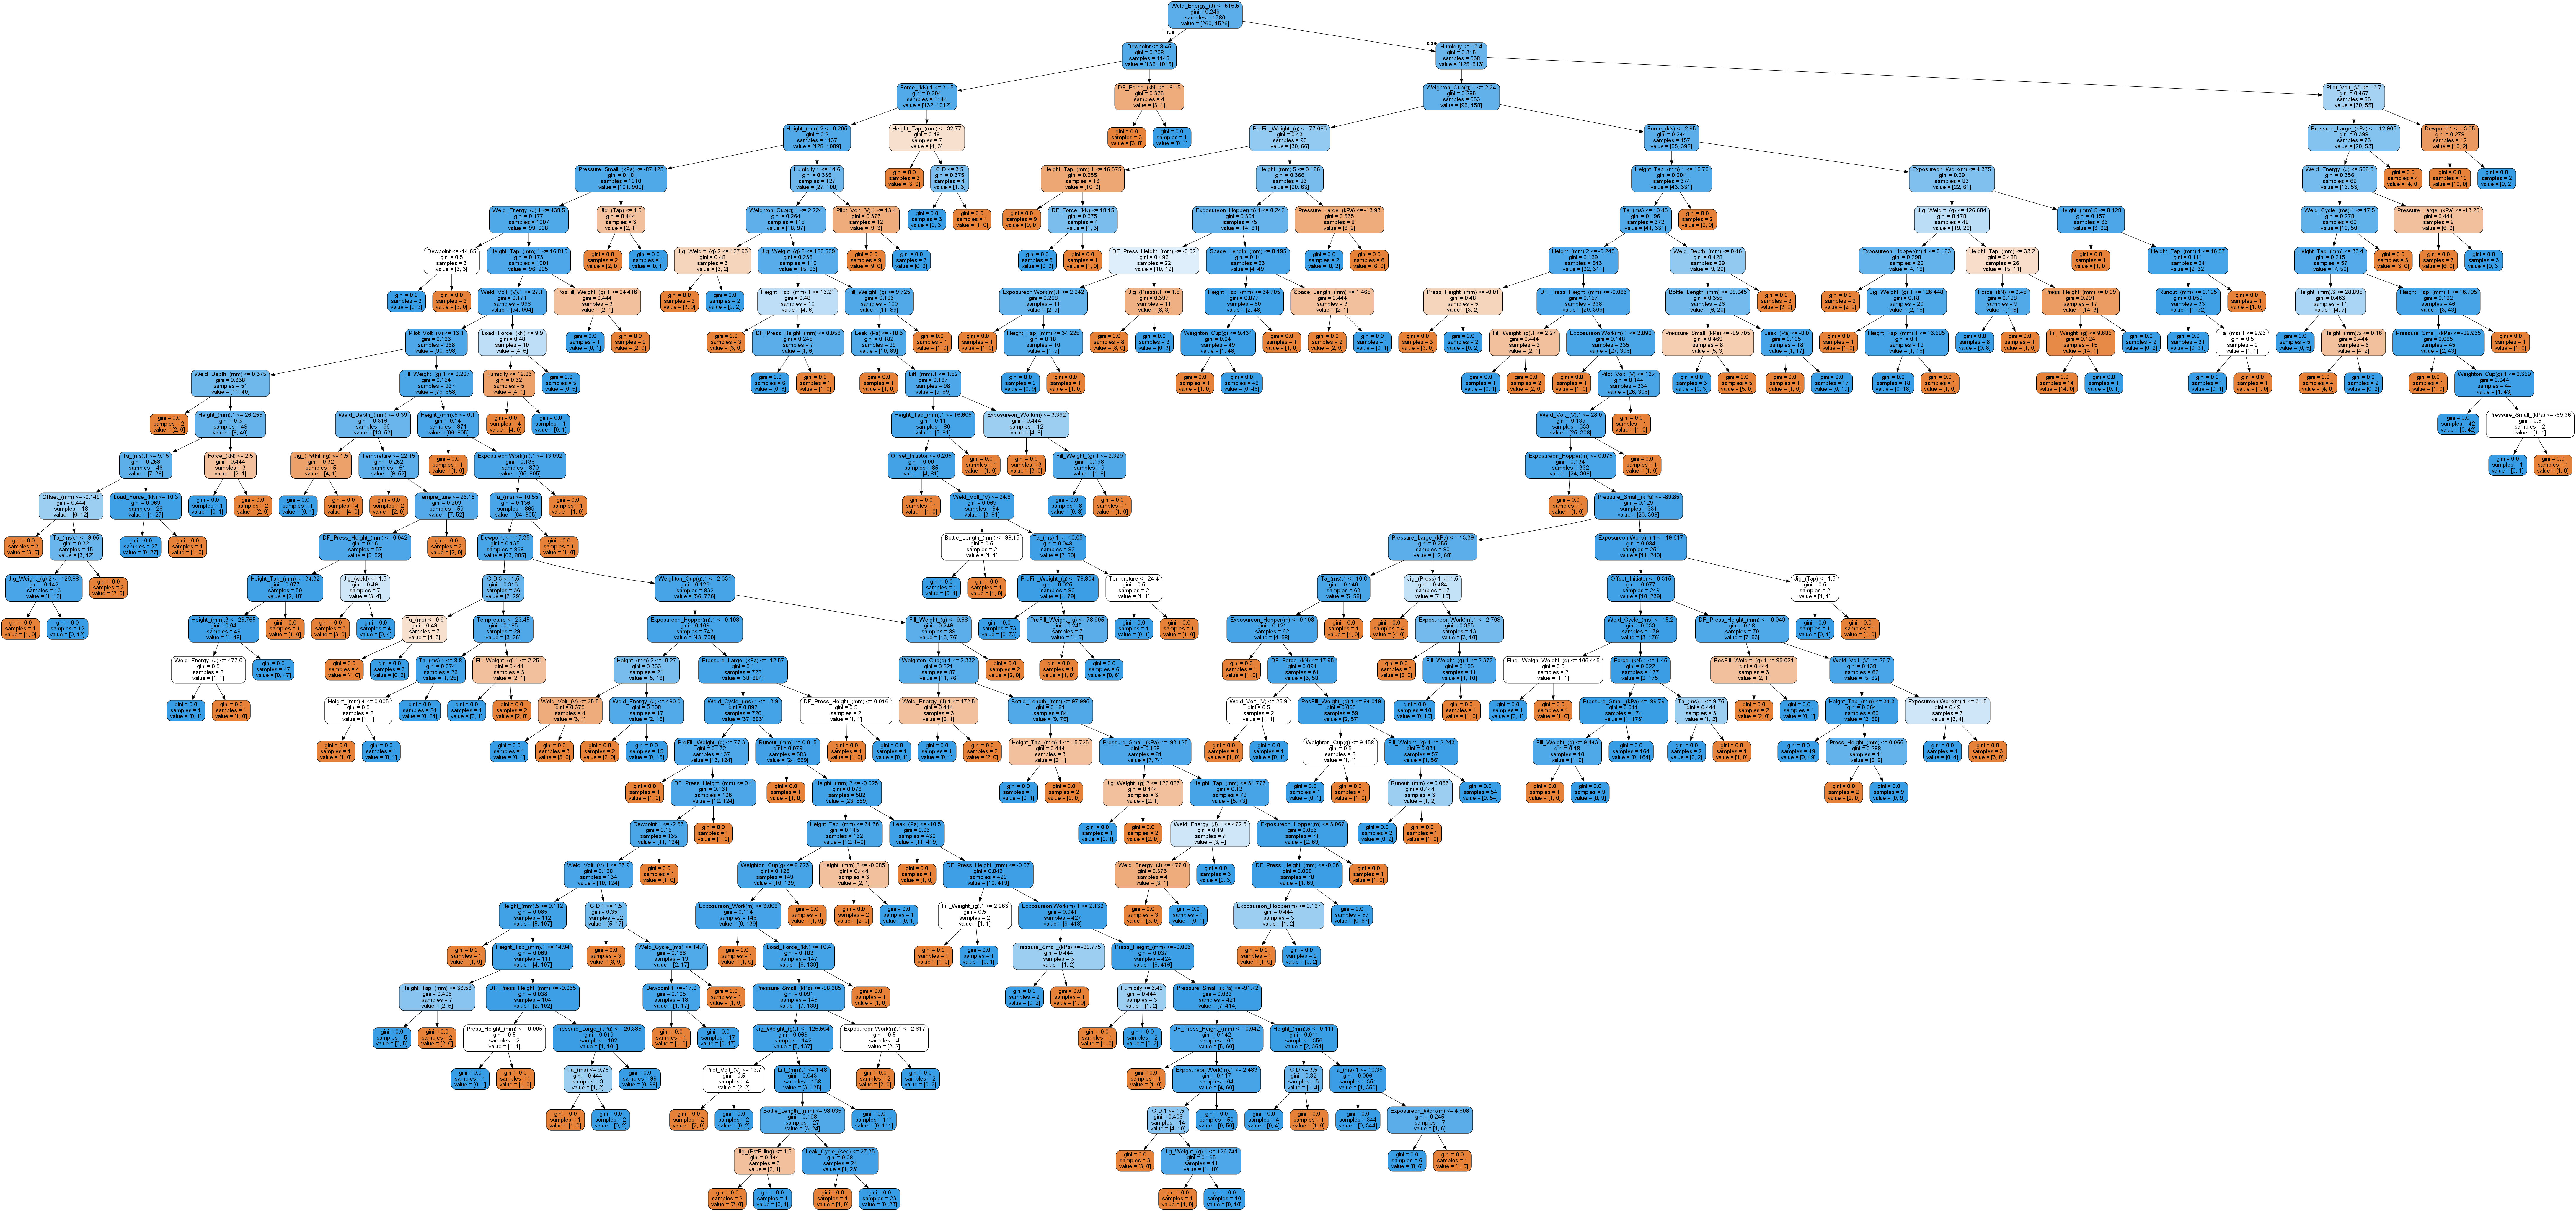

In [33]:
features = list(df.columns[1:])
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())